<a href="https://colab.research.google.com/github/Raghavendra1178/Brain-Tumour-Identification-Using-CNN/blob/master/MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import os
from os import listdir
import cv2
import matplotlib.pyplot as plt
import imutils
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras import layers
from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score, precision_score, recall_score 
from sklearn.metrics import f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve
import seaborn as sns

In [ ]:
os.listdir('/content/drive/MyDrive/Data')

['yestumor', 'notumor']

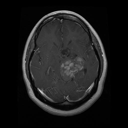

In [ ]:
#showing image of tumor
im = Image.open('/content/drive/MyDrive/Data/yestumor/gg (1).jpg').resize((128, 128))
im


In [ ]:
#setting the directory of our data
yes = os.listdir('/content/drive/MyDrive/Data/yestumor')
no = os.listdir('/content/drive/MyDrive/Data/notumor')

#concate two data
data = np.concatenate([yes,no])
assert (len(data) == len(yes)+len(no))

#mapping our classes to 1 and 0. 1 == yes and 0 == no
target_x = np.full(len(yes),1)
target_y = np.full(len(no),0)

#label of our data
data_target = np.concatenate([target_x,target_y])

assert (len(data_target) == len(target_x)+len(target_y))
assert (len(data_target) == len(data))

print(len(target_x), len(target_y))

2475 493


In [ ]:
#setting the directory of our data
yes = os.listdir('/content/drive/MyDrive/Data/yestumor')
no = os.listdir('/content/drive/MyDrive/Augmented_no')

#concate two data
data = np.concatenate([yes,no])
assert (len(data) == len(yes)+len(no))

#mapping our classes to 1 and 0. 1 == yes and 0 == no
target_x = np.full(len(yes),1)
target_y = np.full(len(no),0)

#label of our data
data_target = np.concatenate([target_x,target_y])

assert (len(data_target) == len(target_x)+len(target_y))
assert (len(data_target) == len(data))

print(len(target_x), len(target_y))

2475 2465


In [ ]:
#Setting the height and width of the image for our model
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMAGE_SIZE = [IMG_HEIGHT, IMG_WIDTH]

In [ ]:
X_data = []
count=0;
#reading images from directory, resizeing to IMG_HEIGHT * IMG_WIDTH * 3 and appending images to a list
for file in yes:
  count=count+1
  print(count)
  img = cv2.imread('/content/drive/MyDrive/Data/yestumor/'+file)
  img2 = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
  (b, g, r) = cv2.split(img2) 
  img = cv2.merge([r,g,b])
  X_data.append(img)

for file in no:
  img = cv2.imread('/content/drive/MyDrive/Augmented_no/'+file)
  img2 = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
  (b, g, r) = cv2.split(img2) 
  img = cv2.merge([r,g,b])
  X_data.append(img)

X_data = np.squeeze(X_data)
assert (len(X_data) == len(data) == len(data_target))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


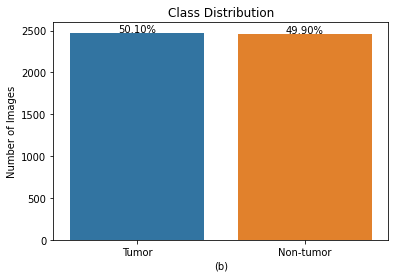

In [ ]:
labels = []
for x in data_target:
  if x == 0:
    labels.append('Non-tumor')
  else:
    labels.append('Tumor')

total = len(labels)

#sns.set(style="darkgrid")
ax = sns.countplot(x=labels)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height*100/total),
            ha="center") 

plt.title('Class Distribution')
plt.ylabel('Number of Images')
plt.xlabel('(b)')
plt.show()

In [ ]:
X=np.array(X_data)
X_data[250].shape == X[250].shape
print(X[250].shape)

(224, 224, 3)


In [ ]:
X = X.astype('float32')
X /= 255

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, data_target, random_state=50, test_size=0.15, stratify = data_target)

print(len(y_train))
print(len(y_test))

4199
741


In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
base_model = MobileNet(weights="imagenet", input_shape=(224,224,3),include_top=False,)

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  
outputs = keras.layers.Dense((1),activation="sigmoid")(x)

mobilenet_model = keras.Model(inputs, outputs, name='BrainTumourDetection')
mobilenet_model.summary()

Model: "BrainTumourDetection"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1)                 1025      
                                                                 
Total params: 3,229,889
Trainable params: 1,02

In [ ]:
mobilenet_model.compile(optimizer="Adam",
                        loss='binary_crossentropy',
                        metrics=['acc'])

In [ ]:
#Add Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
from keras.callbacks import EarlyStopping

# EarlyStopping callback.
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=3, 
                           verbose=1)

callbacks_list = [early_stop]

history = mobilenet_model.fit(X_train,
                              y_train,
                              validation_split = 0.18,
                              epochs=10,
                              batch_size=64,
                              callbacks=callbacks_list)

Epoch 1/10
54/54 [==============================] - 22s 217ms/step - loss: 0.4187 - acc: 0.8008 - val_loss: 0.2141 - val_acc: 0.9286
Epoch 2/10
54/54 [==============================] - 9s 172ms/step - loss: 0.1941 - acc: 0.9317 - val_loss: 0.1498 - val_acc: 0.9511
Epoch 3/10
54/54 [==============================] - 9s 171ms/step - loss: 0.1504 - acc: 0.9500 - val_loss: 0.1237 - val_acc: 0.9656
Epoch 4/10
54/54 [==============================] - 9s 172ms/step - loss: 0.1280 - acc: 0.9585 - val_loss: 0.1129 - val_acc: 0.9669
Epoch 5/10
54/54 [==============================] - 9s 173ms/step - loss: 0.1102 - acc: 0.9646 - val_loss: 0.0994 - val_acc: 0.9709
Epoch 6/10
54/54 [==============================] - 9s 174ms/step - loss: 0.1010 - acc: 0.9698 - val_loss: 0.0951 - val_acc: 0.9762
Epoch 7/10
54/54 [==============================] - 9s 174ms/step - loss: 0.0903 - acc: 0.9739 - val_loss: 0.0869 - val_acc: 0.9722
Epoch 8/10
54/54 [==============================] - 9s 175ms/step - loss: 0

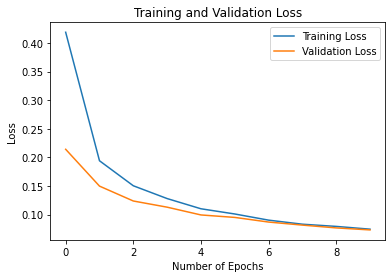

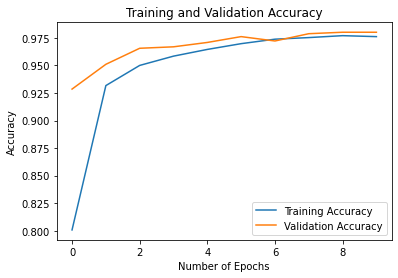

In [ ]:
history = mobilenet_model.history.history

train_loss = history['loss']
val_loss = history['val_loss']
train_acc = history['acc']
val_acc = history['val_acc']


    
# Loss
plt.figure()
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
    
# Accuracy#
plt.figure()
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on test set
score = mobilenet_model.evaluate(X_test, y_test, verbose=0) 

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9662618041038513


In [ ]:
y_hat = mobilenet_model.predict(X_test)
y_pred = [1 if x >= 0.5 else 0 for x in y_hat]

#metrics calculation

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)

# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

# specificity calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print('Specificity: ',specificity)

#classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.966262
Precision: 0.975275
Recall: 0.956873
F1 score: 0.965986
Cohens kappa: 0.932525
ROC AUC: 0.966274
[[361   9]
 [ 16 355]]
Specificity:  0.9756756756756757
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       370
           1       0.98      0.96      0.97       371

    accuracy                           0.97       741
   macro avg       0.97      0.97      0.97       741
weighted avg       0.97      0.97      0.97       741



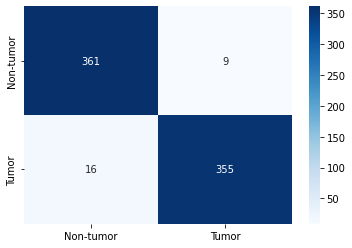

In [ ]:
# plot confusion matrix
categories = ['Non-tumor', 'Tumor']
df_matrix = pd.DataFrame(matrix, index = categories, columns = categories)
sns.heatmap(df_matrix, annot=True, cmap='Blues', fmt='d')

In [ ]:
#index 0 = No , index 1 = Yes
labels = ["No", "Yes"]

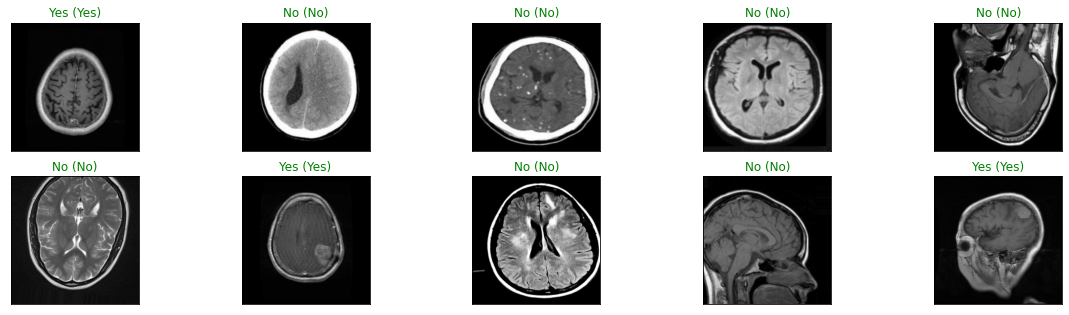

In [ ]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))

for i, index in enumerate(np.random.choice(X_test.shape[0], size=10, replace=False)):
  ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  # Display each image
  ax.imshow(np.squeeze(X_test[index]))
  predict_index = y_pred[index]
  true_index = y_test[index]
  # Set the title for each image
  ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()